In [1]:
#prepare atac data : generate 3 dataset of same size
import anndata as ad
import scanpy as sc
import pandas as pd
import os

def draw_scb_data(atac,ncell,nfeature):
    '''
    return randomly sumsampled atac dataset
    input: atac read from h5ad 
    '''
    split = atac.var_names.str.split(r'[:-]')
    atac.var['chr']=split.map(lambda x:x[0])
    atac.var['start']=split.map(lambda x:x[1]).astype(int)
    atac.var['end']=split.map(lambda x:x[2]).astype(int)
    sc.pp.filter_cells(atac,min_genes=0)
    sc.pp.filter_genes(atac,min_cells=0)
    chrs = ['chr'+str(i) for i in range(1,23)] + ['chrX', 'chrY']
    atac = atac[:, atac.var['chr'].isin(chrs)]
    return atac[pd.Series(atac.obs_names).sample(ncell),pd.Series(atac.var_names).sample(nfeature)].copy()

def call_preprocess(file,process):   
    from preprocess import main
    main(file,'mm10.fa',process)  

def call_train(pth,epoch,bottle_neck,output,trained_model):
    from train import main
    main(pth,epoch,bottle_neck,output,trained_model)


In [2]:
import os
os.getcwd()

'/home/ubuntu0/scBasset/training_pipeline'

In [2]:
call_train('2024-02-25-19_54_56processed/processed7',200,100,'2024-02-25-19_54_56output/output7','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-27 05:03:23.008251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 05:03:23.116193: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 05:03:23.138537: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 05:03:23.506473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-27 05:03:24.552736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 05:03:24.561977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 05:03:24.562026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 05:03:24.562886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-27 05:03:28.666464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-27 05:03:29.403237: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-27 05:03:29.403277: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-27 05:03:29.403353: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-27 05:03:30.462374: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 146ms/step - loss: 0.0496 - auc: 0.7543 - auc_1: 0.0563 - val_loss: 0.0490 - val_auc: 0.7671 - val_auc_1: 0.0859
Epoch 2/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0483 - auc: 0.7683 - auc_1: 0.0625 - val_loss: 0.0490 - val_auc: 0.7638 - val_auc_1: 0.0860
Epoch 3/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0479 - auc: 0.7748 - auc_1: 0.0658 - val_loss: 0.0489 - val_auc: 0.7666 - val_auc_1: 0.0865
Epoch 4/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0475 - auc: 0.7817 - auc_1: 0.0689 - val_loss: 0.0491 - val_auc: 0.7596 - val_auc_1: 0.0855
Epoch 5/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0471 - auc: 0.7884 - auc_1: 0.0730 - val_loss: 0.0496 - val_auc: 0.7688 - val_auc_1: 0.0872
Epoch 6/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0469 - auc: 0.7931 - auc_1: 0.0747 - val_loss: 0.0490 - val_auc: 0.7622 

In [2]:
call_train('2024-02-25-19_54_56processed/processed6',200,100,'2024-02-25-19_54_56output/output6','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-27 01:14:24.287709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 01:14:24.495158: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 01:14:24.546740: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 01:14:25.112046: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-27 01:14:26.391173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 01:14:26.420611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 01:14:26.420720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 01:14:26.421568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-27 01:14:31.141523: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-27 01:14:32.134215: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-27 01:14:32.134249: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-27 01:14:32.134321: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-27 01:14:33.176619: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 147ms/step - loss: 0.0496 - auc: 0.7546 - auc_1: 0.0558 - val_loss: 0.0491 - val_auc: 0.7621 - val_auc_1: 0.0839
Epoch 2/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0484 - auc: 0.7675 - auc_1: 0.0616 - val_loss: 0.0490 - val_auc: 0.7630 - val_auc_1: 0.0863
Epoch 3/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0480 - auc: 0.7744 - auc_1: 0.0650 - val_loss: 0.0491 - val_auc: 0.7690 - val_auc_1: 0.0864
Epoch 4/200
422/422 [==============================] - 61s 144ms/step - loss: 0.0476 - auc: 0.7814 - auc_1: 0.0689 - val_loss: 0.0494 - val_auc: 0.7644 - val_auc_1: 0.0857
Epoch 5/200
422/422 [==============================] - 62s 145ms/step - loss: 0.0471 - auc: 0.7879 - auc_1: 0.0734 - val_loss: 0.0491 - val_auc: 0.7640 - val_auc_1: 0.0840
Epoch 6/200
422/422 [==============================] - 62s 145ms/step - loss: 0.0469 - auc: 0.7928 - auc_1: 0.0746 - val_loss: 0.0492 - val_auc: 0.7566 

In [2]:
import time 
now = time.strftime('%Y-%m-%d-%H_%M_%S',time.localtime(time.time()))
now

'2024-02-25-19_54_56'

In [3]:

# atac=ad.read_h5ad('/home/ubuntu0/scBasset/Chen-2019-ATAC.h5ad')
atacl= []
file_name=[]
processed_name =[]
output=[]
ncell=4000
nfeature=60000
atac=ad.read_h5ad('/home/ubuntu0/scBasset/Chen-2019-ATAC.h5ad')
folder= now + 'data'
os.makedirs(folder,exist_ok=True)
os.makedirs(now+'processed',exist_ok=True)
os.makedirs(now+'output',exist_ok=True)
epoch=100
trained_model=None # or best_model.h5 file

for i in range(8):
    #generate 3 dataset
    atacl.append(draw_scb_data(atac,ncell,nfeature))
    atacl[i].write_h5ad(folder+'/atac'+str(i)+'.h5ad')
    file_name.append(folder+'/atac'+str(i)+'.h5ad')
    processed_name.append(now+'processed/processed'+str(i))
    #preprocess dataset
    call_preprocess(file_name[i],processed_name[i])
    output.append(now+'ouput/output'+str(i))
    #train data for 100 epoch,change chrome length to 2344
    # call_train(processed_name[i],epoch,output[i],trained_model)
    


/home/ubuntu0/scBasset/training_pipeline
['/home/ubuntu0/scBasset/training_pipeline', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python37.zip', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/lib-dynload', '', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages/IPython/extensions', '/home/ubuntu0/.ipython']


2024-02-25 19:55:49.855217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-25 19:55:50.824204: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 19:55:51.190605: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 19:55:52.618997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Namespace(ad_file='2024-02-25-19_54_56data/atac0.h5ad', input_fasta='mm10.fa', out_path='2024-02-25-19_54_56processed/processed0')
successful writing h5ad file.
successful writing bed file.
successful writing split file.
successful writing sparse m.
process 0 peaks takes 0.9 s
process 1000 peaks takes 1.7 s
process 2000 peaks takes 2.5 s
process 3000 peaks takes 3.2 s
process 4000 peaks takes 3.9 s
process 5000 peaks takes 4.6 s
process 6000 peaks takes 5.3 s
process 7000 peaks takes 6.0 s
process 8000 peaks takes 6.7 s
process 9000 peaks takes 7.3 s
process 10000 peaks takes 8.0 s
process 11000 peaks takes 8.8 s
process 12000 peaks takes 9.5 s
process 13000 peaks takes 10.1 s
process 14000 peaks takes 10.7 s
process 15000 peaks takes 11.3 s
process 16000 peaks takes 11.9 s
process 17000 peaks takes 12.5 s
process 18000 peaks takes 13.0 s
process 19000 peaks takes 13.5 s
process 20000 peaks takes 13.9 s
process 21000 peaks takes 14.4 s
process 22000 peaks takes 14.8 s
process 23000 pea

In [8]:
os.getcwd()

'/home/ubuntu0/scBasset/training_pipeline'

In [2]:
call_train('2024-02-25-19_54_56processed/processed5',200,100,'2024-02-25-19_54_56output/output5','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-26 21:35:46.198910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 21:35:46.401874: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 21:35:46.450447: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 21:35:46.931430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-26 21:35:47.959020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:35:47.981610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:35:47.981672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 21:35:47.982348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-26 21:35:52.358437: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-26 21:35:53.274089: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-26 21:35:53.274122: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-26 21:35:53.274184: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-26 21:35:54.227742: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 147ms/step - loss: 0.0496 - auc: 0.7535 - auc_1: 0.0552 - val_loss: 0.0491 - val_auc: 0.7654 - val_auc_1: 0.0856
Epoch 2/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0483 - auc: 0.7680 - auc_1: 0.0633 - val_loss: 0.0492 - val_auc: 0.7599 - val_auc_1: 0.0856
Epoch 3/200
422/422 [==============================] - 61s 144ms/step - loss: 0.0479 - auc: 0.7754 - auc_1: 0.0660 - val_loss: 0.0490 - val_auc: 0.7647 - val_auc_1: 0.0868
Epoch 4/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0475 - auc: 0.7816 - auc_1: 0.0700 - val_loss: 0.0490 - val_auc: 0.7665 - val_auc_1: 0.0865
Epoch 5/200
422/422 [==============================] - 61s 144ms/step - loss: 0.0471 - auc: 0.7876 - auc_1: 0.0734 - val_loss: 0.0491 - val_auc: 0.7657 - val_auc_1: 0.0848
Epoch 6/200
422/422 [==============================] - 62s 145ms/step - loss: 0.0469 - auc: 0.7929 - auc_1: 0.0738 - val_loss: 0.0492 - val_auc: 0.7566 

In [2]:
call_train('2024-02-25-19_54_56processed/processed4',200,100,'2024-02-25-19_54_56output/output4','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-26 17:59:45.849676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 17:59:45.936884: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 17:59:45.956009: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 17:59:46.313425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-26 17:59:47.524025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 17:59:47.531739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 17:59:47.531774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 17:59:47.532373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-26 17:59:51.356329: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-26 17:59:52.033699: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-26 17:59:52.033743: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-26 17:59:52.033792: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-26 17:59:52.823099: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 68s 146ms/step - loss: 0.0495 - auc: 0.7547 - auc_1: 0.0567 - val_loss: 0.0490 - val_auc: 0.7661 - val_auc_1: 0.0869
Epoch 2/200
422/422 [==============================] - 60s 141ms/step - loss: 0.0483 - auc: 0.7692 - auc_1: 0.0637 - val_loss: 0.0491 - val_auc: 0.7651 - val_auc_1: 0.0857
Epoch 3/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0479 - auc: 0.7752 - auc_1: 0.0662 - val_loss: 0.0490 - val_auc: 0.7596 - val_auc_1: 0.0875
Epoch 4/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0476 - auc: 0.7801 - auc_1: 0.0681 - val_loss: 0.0490 - val_auc: 0.7608 - val_auc_1: 0.0858
Epoch 5/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0472 - auc: 0.7877 - auc_1: 0.0718 - val_loss: 0.0495 - val_auc: 0.7673 - val_auc_1: 0.0869
Epoch 6/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0469 - auc: 0.7928 - auc_1: 0.0744 - val_loss: 0.0490 - val_auc: 0.7626 

In [2]:
call_train('2024-02-25-19_54_56processed/processed2',200,100,'2024-02-25-19_54_56output/output2','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-26 04:17:08.305852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 04:17:08.499134: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 04:17:08.542959: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 04:17:09.035759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-26 04:17:10.091826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 04:17:10.113057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 04:17:10.113101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 04:17:10.113827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-26 04:17:14.588168: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-26 04:17:15.532855: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-26 04:17:15.532883: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-26 04:17:15.532941: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-26 04:17:16.476000: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 146ms/step - loss: 0.0496 - auc: 0.7542 - auc_1: 0.0552 - val_loss: 0.0498 - val_auc: 0.7720 - val_auc_1: 0.0860
Epoch 2/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0484 - auc: 0.7679 - auc_1: 0.0625 - val_loss: 0.0490 - val_auc: 0.7622 - val_auc_1: 0.0868
Epoch 3/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0479 - auc: 0.7747 - auc_1: 0.0662 - val_loss: 0.0490 - val_auc: 0.7645 - val_auc_1: 0.0868
Epoch 4/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0475 - auc: 0.7816 - auc_1: 0.0692 - val_loss: 0.0492 - val_auc: 0.7640 - val_auc_1: 0.0865
Epoch 5/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0472 - auc: 0.7880 - auc_1: 0.0721 - val_loss: 0.0493 - val_auc: 0.7524 - val_auc_1: 0.0858
Epoch 6/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0468 - auc: 0.7932 - auc_1: 0.0749 - val_loss: 0.0491 - val_auc: 0.7586 

In [2]:
call_train('2024-02-25-19_54_56processed/processed1',200,100,'2024-02-25-19_54_56output/output1','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-26 00:33:03.486708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 00:33:03.674414: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 00:33:03.719902: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 00:33:04.274636: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-26 00:33:05.558435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 00:33:05.580395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 00:33:05.580438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 00:33:05.581375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-26 00:33:09.971203: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-26 00:33:10.957755: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-26 00:33:10.957785: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-26 00:33:10.957848: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-26 00:33:11.956059: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 147ms/step - loss: 0.0496 - auc: 0.7541 - auc_1: 0.0552 - val_loss: 0.0490 - val_auc: 0.7628 - val_auc_1: 0.0867
Epoch 2/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0484 - auc: 0.7673 - auc_1: 0.0617 - val_loss: 0.0489 - val_auc: 0.7643 - val_auc_1: 0.0860
Epoch 3/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0480 - auc: 0.7747 - auc_1: 0.0655 - val_loss: 0.0490 - val_auc: 0.7654 - val_auc_1: 0.0858
Epoch 4/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0476 - auc: 0.7811 - auc_1: 0.0685 - val_loss: 0.0490 - val_auc: 0.7642 - val_auc_1: 0.0851
Epoch 5/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0472 - auc: 0.7874 - auc_1: 0.0723 - val_loss: 0.0492 - val_auc: 0.7555 - val_auc_1: 0.0860
Epoch 6/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0469 - auc: 0.7927 - auc_1: 0.0738 - val_loss: 0.0491 - val_auc: 0.7581 

In [2]:
call_train('2024-02-25-19_54_56processed/processed0',200,100,'2024-02-25-19_54_56output/output0','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-25 20:42:15.300138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-25 20:42:16.083080: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 20:42:16.350147: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 20:42:17.562917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-25 20:42:20.696164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-25 20:42:20.787470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-25 20:42:20.787624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-25 20:42:20.794882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-25 20:42:26.350445: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-25 20:42:27.861111: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-25 20:42:27.861142: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-25 20:42:27.861184: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-25 20:42:29.846887: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 75s 154ms/step - loss: 0.0502 - auc: 0.7512 - auc_1: 0.0559 - val_loss: 0.0496 - val_auc: 0.7687 - val_auc_1: 0.0847
Epoch 2/200
422/422 [==============================] - 63s 148ms/step - loss: 0.0488 - auc: 0.7668 - auc_1: 0.0635 - val_loss: 0.0496 - val_auc: 0.7671 - val_auc_1: 0.0848
Epoch 3/200
422/422 [==============================] - 64s 149ms/step - loss: 0.0485 - auc: 0.7728 - auc_1: 0.0661 - val_loss: 0.0496 - val_auc: 0.7664 - val_auc_1: 0.0856
Epoch 4/200
422/422 [==============================] - 64s 150ms/step - loss: 0.0480 - auc: 0.7802 - auc_1: 0.0695 - val_loss: 0.0496 - val_auc: 0.7665 - val_auc_1: 0.0865
Epoch 5/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0478 - auc: 0.7850 - auc_1: 0.0722 - val_loss: 0.0496 - val_auc: 0.7700 - val_auc_1: 0.0860
Epoch 6/200
422/422 [==============================] - 60s 142ms/step - loss: 0.0474 - auc: 0.7908 - auc_1: 0.0739 - val_loss: 0.0498 - val_auc: 0.7615 

In [2]:
call_train('2024-02-25-19_54_56processed/processed3',200,100,'2024-02-25-19_54_56output/output3','/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')

2024-02-26 08:00:28.276046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 08:00:28.472192: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 08:00:28.518334: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 08:00:29.000496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-26 08:00:30.123447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 08:00:30.143071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 08:00:30.143127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 08:00:30.144421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-26 08:00:34.517921: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-26 08:00:35.480077: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-26 08:00:35.480108: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-26 08:00:35.480169: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-26 08:00:36.541352: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 69s 147ms/step - loss: 0.0495 - auc: 0.7553 - auc_1: 0.0557 - val_loss: 0.0490 - val_auc: 0.7686 - val_auc_1: 0.0869
Epoch 2/200
422/422 [==============================] - 61s 142ms/step - loss: 0.0483 - auc: 0.7681 - auc_1: 0.0629 - val_loss: 0.0489 - val_auc: 0.7640 - val_auc_1: 0.0863
Epoch 3/200
422/422 [==============================] - 61s 143ms/step - loss: 0.0479 - auc: 0.7758 - auc_1: 0.0663 - val_loss: 0.0491 - val_auc: 0.7619 - val_auc_1: 0.0861
Epoch 4/200
422/422 [==============================] - 62s 144ms/step - loss: 0.0475 - auc: 0.7816 - auc_1: 0.0690 - val_loss: 0.0492 - val_auc: 0.7556 - val_auc_1: 0.0857
Epoch 5/200
422/422 [==============================] - 62s 146ms/step - loss: 0.0472 - auc: 0.7879 - auc_1: 0.0725 - val_loss: 0.0492 - val_auc: 0.7631 - val_auc_1: 0.0873
Epoch 6/200
422/422 [==============================] - 62s 146ms/step - loss: 0.0469 - auc: 0.7928 - auc_1: 0.0742 - val_loss: 0.0494 - val_auc: 0.7543 

In [7]:
now

'2024-01-31-22_55_35'

['/home/ubuntu0/scBasset/', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python37.zip', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/lib-dynload', '', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages', '/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages/IPython/extensions', '/home/ubuntu0/.ipython']


/home/ubuntu0/miniconda3/envs/scbasset/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


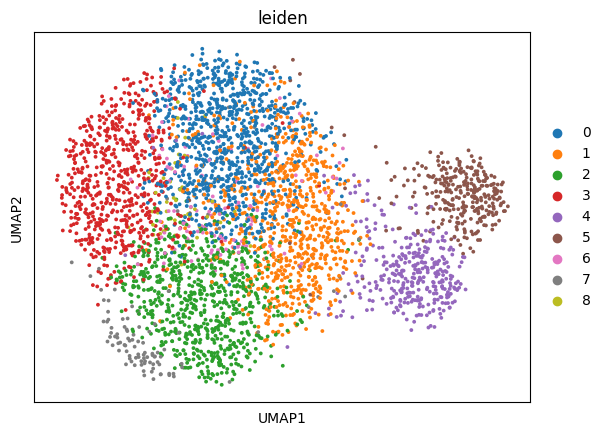

In [14]:
import anndata as ad
import sys
import scanpy as sc
print(sys.path)
sys.path[0]='/home/ubuntu0/scBasset/'
from scbasset.utils import make_model,get_cell_embedding

atac=ad.read_h5ad('/home/ubuntu0/scBasset/training_pipeline/2024-01-31-22_55_35data/atac0.h5ad')
model = make_model(100,atac.shape[0],show_summary=False)
model.load_weights('/home/ubuntu0/scBasset/training_pipeline/output0/best_model.h5')
proj=get_cell_embedding(model)
atac.obsm['proj']=proj

sc.pp.neighbors(atac,use_rep = 'proj',metric='cosine')
sc.tl.umap(atac)
sc.tl.leiden(atac)
sc.pl.umap(atac,color=['leiden'])

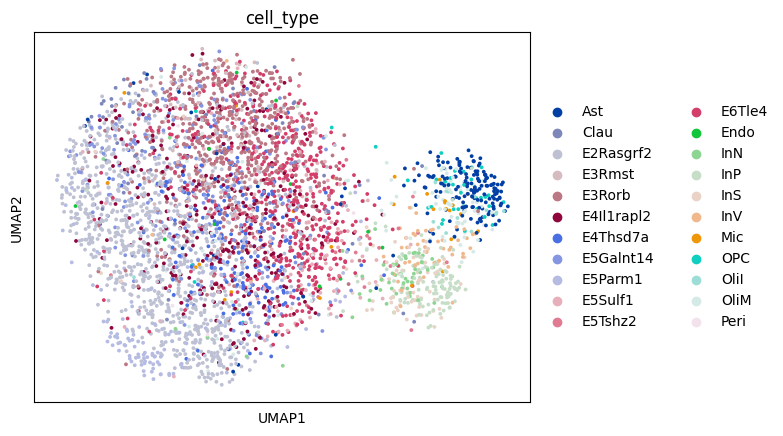

In [16]:
sc.pp.neighbors(atac,use_rep = 'proj',metric='cosine')
sc.tl.umap(atac)
sc.tl.leiden(atac)
sc.pl.umap(atac,color=['cell_type'])

In [2]:
# call_train('2024-01-27-06_43_00processed/processed1',100,100,'output1',None)
call_train('2024-01-31-22_55_35processed/processed1',100,100,'output1',None)

2024-02-01 04:48:48.037285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 04:48:48.293762: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 04:48:48.358677: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 04:48:48.975316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-01 04:48:49.567148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 04:48:49.604089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 04:48:49.604135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 04:48:49.604828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-01 04:48:54.280639: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-01 04:48:55.691064: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-01 04:48:55.691090: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-01 04:48:55.691152: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-01 04:48:57.273468: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 71s 148ms/step - loss: 0.0634 - auc: 0.6611 - auc_1: 0.0214 - val_loss: 0.0547 - val_auc: 0.7041 - val_auc_1: 0.0467
Epoch 2/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0520 - auc: 0.6820 - auc_1: 0.0364 - val_loss: 0.0521 - val_auc: 0.6959 - val_auc_1: 0.0591
Epoch 3/100
422/422 [==============================] - 61s 143ms/step - loss: 0.0516 - auc: 0.6880 - auc_1: 0.0392 - val_loss: 0.0527 - val_auc: 0.7061 - val_auc_1: 0.0617
Epoch 4/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0514 - auc: 0.6929 - auc_1: 0.0401 - val_loss: 0.0522 - val_auc: 0.6818 - val_auc_1: 0.0557
Epoch 5/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0511 - auc: 0.6972 - auc_1: 0.0443 - val_loss: 0.0516 - val_auc: 0.6988 - val_auc_1: 0.0633
Epoch 6/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0508 - auc: 0.7018 - auc_1: 0.0458 - val_loss: 0.0514 - val_auc: 0.6970 

In [2]:
# call_train('2024-01-27-06_43_00processed/processed2',100,100,'output2',None)
call_train('2024-01-31-22_55_35processed/processed2',100,100,'output2',None)

2024-02-01 06:35:24.382729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 06:35:24.593197: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 06:35:24.646161: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 06:35:25.166288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

cpu memory used: 0.6GB.


2024-02-01 06:35:25.801548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 06:35:25.828886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 06:35:25.828936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 06:35:25.830042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1344, 4)]    0           []                               
                                                                                                  
 stochastic_reverse_complement   ((None, 1344, 4),   0           ['sequence[0][0]']               
 (StochasticReverseComplement)   ())                                                              
                                                                                                  
 stochastic_shift (StochasticSh  (None, 1344, 4)     0           ['stochastic_reverse_complement[0
 ift)                                                            ][0]']                           
                                                                                              

2024-02-01 06:35:30.724492: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2024-02-01 06:35:31.777067: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-01 06:35:31.777119: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-01 06:35:31.777223: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-01 06:35:33.254295: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 71s 149ms/step - loss: 0.0631 - auc: 0.6619 - auc_1: 0.0219 - val_loss: 0.0526 - val_auc: 0.6877 - val_auc_1: 0.0480
Epoch 2/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0519 - auc: 0.6848 - auc_1: 0.0369 - val_loss: 0.0552 - val_auc: 0.7113 - val_auc_1: 0.0569
Epoch 3/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0515 - auc: 0.6893 - auc_1: 0.0397 - val_loss: 0.0522 - val_auc: 0.6962 - val_auc_1: 0.0612
Epoch 4/100
422/422 [==============================] - 61s 143ms/step - loss: 0.0512 - auc: 0.6946 - auc_1: 0.0419 - val_loss: 0.0522 - val_auc: 0.6965 - val_auc_1: 0.0558
Epoch 5/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0509 - auc: 0.7014 - auc_1: 0.0442 - val_loss: 0.0551 - val_auc: 0.7200 - val_auc_1: 0.0679
Epoch 6/100
422/422 [==============================] - 61s 144ms/step - loss: 0.0507 - auc: 0.7062 - auc_1: 0.0489 - val_loss: 0.0520 - val_auc: 0.7045 